# Principal Componenet Analysis

### Disadvantages of High Dimensionality
* As dimension increases, number of samples for an estimator increases
* Acquiring large data might be infeasible
* Learining rom them requires more memory and processing power
* Sparseness of data increases
* Difficult to detect similar instances

### What is PCA?
* Technique for finding patterns in high-dimensional data
* Used to explore and visualize high dimensional data
* User to compress and process data before being used by another estimator
* Principal components - reduces a set of:
  * Correlated high dimensional variables to uncorrelated synthetic variables
  
### How Does PCA Reduce Dimensions?
* Projects the data onto a lower dimensional subspace
* M-dimensional can be reduced by projecting on n-dimensional data (n<m)
* Finds a set of vectors to span a subsapce that minimizes the sum of
  squared errors of projected data
  
##### Variance - Average of the squared differences of the values and the mean of the values
$s^2 = \frac{\sum^n_{i=1}(X_i-\hat{X})^2}{n-1}$

##### Covariance - Measure of how much two variables change together
* Measure of strength of a correlation between two sets of variables
* Coveriance = 0; variables are uncorrelated  
* Coveriance is non-zero, sign indicates negative or positive correlation
  * Positive correlation - one increases with the other
  * Negative correlation - one increases as other decreases  
  
$cov(X,Y) = \frac{\sum^n_{i=1}(X_i-\hat{x})(Y_i-\hat{y})}{n-1}$

* A *Covariance Matrix* describes covariance between each pair of dimensions
  * (i,j) - covariance of $i^{th}$ and $j^{th}$ dimensions

In [1]:
# Create variance matrix
import numpy as np

X = np.array([
    [2, 0, -1.4],
    [2.2, 0.2, -1.5],
    [2.4, 0.1, -1],
    [1.9, 0, -1.2]
])

print(np.cov(X).T)

[[2.92       3.16       2.95       2.67      ]
 [3.16       3.43       3.175      2.885     ]
 [2.95       3.175      3.01       2.705     ]
 [2.67       2.885      2.705      2.44333333]]


# Eigenvectors
* Described by direction and magnitude  
  $A\overrightarrow{v} = \lambda\overrightarrow{v}$
* Direction remains same, magnitude changes
* Multiplying matrix by its Eigen vector is equal to scaling the vector

#### Eigenvectors and Eigenvalues
* Can only be derived from square matrices
* Not all square matrices have Eigen vectors
* Matrix will have a pair of Eigen vectors and values for each dimension
* Principal componenets are eigen vectors of the covariance matrix
* Eigen vector with the greatest Eigen value is first prinicipal component
  * Eigen vector with second greatest Eigen value is second component
  
###### Example:
$A = \begin{bmatrix}1 & -2\\2 & -3\end{bmatrix}$  
Characteristic equation: $(A - \lambda I)\overrightarrow{v} = 0$

$|A-\lambda\cdot I| = \left|\begin{bmatrix}1 & -2\\2 & -3\end{bmatrix}-
\begin{bmatrix}\lambda & 0\\0 & \lambda\end{bmatrix}\right| = 0$

$\left|\begin{bmatrix}1-\lambda & -2 \\ 2 & -3-\lambda\end{bmatrix}\right|
= (\lambda+1)(\lambda+1) = 0$

**Substitute our value for A int he characteristic equation**  
$\begin{bmatrix}1-\lambda & -2 \\ 2 & -3-\lambda\end{bmatrix}
\overrightarrow{v} =
\begin{bmatrix}1-\lambda & -2 \\ 2 & -3-\lambda\end{bmatrix}\cdot
\begin{bmatrix}v_{1,1} \\ v_{1,2}\end{bmatrix} = 0$

**Substitute first Eigen value**  
$\begin{bmatrix}1-(-1) & -2 \\ 2 & -3-(-1)\end{bmatrix}\cdot
\begin{bmatrix}v_{1,1} \\ v_{1,2}\end{bmatrix} =
\begin{bmatrix}2 &-2 \\ 2 & -2\end{bmatrix}\cdot
\begin{bmatrix}v_{1,1} \\ v_{1,2}\end{bmatrix} = 0$

**Rewritten as System of Equations**  
$\begin{equation*}
  \max
  \begin{cases}
    \! % artifact from aligned(at)
    \begin{alignedat}{2}
      && 2v_{1,1} +\ -(2v_{1,2}) = 0;
      \\
      && 2v_{1,1} +\ -(2v_{1,2}) = 0;
    \end{alignedat}
  \end{cases}
\end{equation*}$

**Any non-zero vector that satisfies the equations can be used as an Eigen vector**  
$\begin{bmatrix}1 & -2 \\ 2 & -3\end{bmatrix}\cdot
\begin{bmatrix}1 \\ 1\end{bmatrix} =
-1\cdot\begin{bmatrix}1 \\ 1\end{bmatrix} =
\begin{bmatrix}-1 \\ -1\end{bmatrix} =$

**PCA requires unit Eigen vectors or Eigen vectors that have length equal to one**  
##### Normalising an Eigen Vector By Dividing by its Norm
$||x|| = \sqrt{x^2_1 + x^2_2 + ... + x^2_n}$

$\left|\left|\begin{bmatrix}1 \\ 1\end{bmatrix}\right|\right| = 
\sqrt{1^2 + 1^2} = \sqrt{2}$

$\begin{bmatrix}1 \\ 1\end{bmatrix}/\sqrt{2} = 
\begin{bmatrix}0.707 \\ 0.707\end{bmatrix} =$

In [2]:
# Return a tuple of the Eigen values and Eigen vectors
import numpy as np
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print(w)
print(v)

[-0.99999998 -1.00000002]
[[0.70710678 0.70710678]
 [0.70710678 0.70710678]]


# Visualizing High-Dimensional Data with PCA
* Used to discover patterns
* High dimensional data cannot be represented graphically
* We can gain insights by reducing it to two or three components

#### IRIS Data Set
* Colleted in 1936
* Fifty samples from three Iris species
  * Iris setosa
  * Iris virginica
  * Iris versicolor
* Explanitory variables - length and width of petals and sepals
* Commonly used to test classification models
* Inlcuded in Scikit-Learn

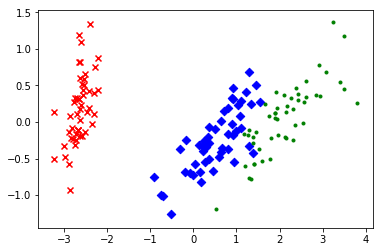

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the built-in Iris dataset
data = load_iris()

# Differentiate target data and labels
y = data.target
X = data.data

# Create an instance of a PCA estimator. Note 2 components as 2 Explan. variables
# Returns reduced data matrix with fit_transform
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

# Assemble and plot reduced data
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

# Face Recognition with PCA
Face recognition is the supervised classification task of
identifiying a person from an image of his or her face

#### The database of faces
* From [AT&T Laboratories Cambridge](https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html)
* Tem images of 40 people in differnt lighting conditions with different expressions
* Images are in greyscale

In [4]:
import os
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image

X = []
y = []

# Load images into numpy arrays and reshape pixels into vectors
for dirpath, _, filenames in os.walk('att_faces'):
    for filename in filenames:
        if filename[-3:] == 'pgm':
            img = Image.open(os.path.join(dirpath, filename)).convert('L')
            arr = np.array(img).reshape(10304).astype('float32') / 255
            X.append(arr)
            y.append(dirpath)

# Standardize the data
X = scale(X)

/home/will/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# Randomly split data into training and test sets
# Reduce all the instances to 150 dimentions
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

In [6]:
# Train the logistic regressor
# Scikit-Learn automatically creates binary classifiers
# using the one-vs-all strategy.

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train.shape)
print(X_train_reduced.shape)

# Evaluate the performance of the classifier
classifier = LogisticRegression()
accuracies = cross_val_score(classifier, X_train_reduced, y_train)
print('Cross validation accuracy: %s' % np.mean(accuracies))
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test, predictions))

(300, 10304)
(300, 150)
Cross validation accuracy: 0.788952588952589
               precision    recall  f1-score   support

 att_faces/s1       1.00      0.67      0.80         3
att_faces/s10       0.50      1.00      0.67         1
att_faces/s11       1.00      1.00      1.00         4
att_faces/s12       1.00      1.00      1.00         1
att_faces/s13       0.50      1.00      0.67         1
att_faces/s14       1.00      0.75      0.86         4
att_faces/s15       1.00      1.00      1.00         2
att_faces/s16       0.67      1.00      0.80         2
att_faces/s17       1.00      1.00      1.00         3
att_faces/s18       1.00      1.00      1.00         3
att_faces/s19       0.50      1.00      0.67         1
 att_faces/s2       1.00      1.00      1.00         4
att_faces/s20       1.00      1.00      1.00         2
att_faces/s21       1.00      1.00      1.00         1
att_faces/s22       1.00      1.00      1.00         1
att_faces/s23       1.00      1.00      1.00      

/home/will/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/will/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
